In [1]:
import tensorflow as tf

# Get the list of physical GPUs
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    try:
        # Set memory growth BEFORE runtime initialization
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth enabled for GPU")
    except RuntimeError as e:
        print(f"RuntimeError: {e}")

2025-04-13 14:13:35.731471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-13 14:13:35.731600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-13 14:13:35.850432: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 14:13:36.022917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Memory growth enabled for GPU


2025-04-13 14:13:41.591638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-13 14:13:41.795723: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-13 14:13:41.795785: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
!pip install pandas
!pip install opencv-python   # cv2
!pip install scikit-learn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 9.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 9.1 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 8.0 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 11.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
# import cv2  # ImportError: libGL.so.1: cannot open shared object file: No such file or directory => to edit dockerfile
from PIL import Image
from sklearn.model_selection import train_test_split

In [53]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Oefening: Gezichtsdetectie met een CNN en Non-Maximum Suppression (NMS)

### Doelstelling
Train een CNN om onderscheid te maken tussen gezichten en niet-gezichten, gebruik het getrainde model om gezichten in een afbeelding te detecteren, en teken bounding boxes rond herkende gezichten. Implementeer daarna **Non-Maximum Suppression (NMS)** om overlappende bounding boxes te reduceren.

Doorloop de volgende stappen:

Compileer een training set met gezichten en niet-gezichten. Online zijn verschillende gezichtsdatasets te vinden.  

Bijvoorbeeld:  
- https://lionbridge.ai/datasets/5-million-faces-top-15-free-image-datasets-for-facial-recognition/ 
- http://shuoyang1213.me/WIDERFACE/  


Train een CNN (mag via transfer learning, maar hoeft niet) die met een hoge accuraatheid gezichten van niet-gezichten kan onderscheiden.  


Test deze CNN om een idee te hebben van de classifiation accuracy.
Indien de performantie voldoende hoog is kan je een sliding window detector implementeren. Dit betekent dat je de test-afbeelding meerdere keren afscant met een sliding window van verschillende groottes. Het CNN zal voor elke positie van het sliding window een classificatie doen van de subimage die onder het window is gelegen. 

Teken een bounding box wanneer de subimage een gezicht bevat.

Extra uitbreiding:

Probleem: omdat we de afbeelding meerdere keren afscannen, telkens met windows van verschillende grootte is het goed mogelijk dat er meerdere bounding boxes worden geteked rond hetzelfde gezicht. Zoek naar een manier om meerdere bounding boxes die bij hetzelfde gezicht horen samen te voegen tot 1 bounding box. Een veel gebruikte techniek is Non-Maximum Suppression

## Stap 1: Datasetvoorbereiding

Gebruik een gezichtsdetectiedataset zoals:

- **Positive samples (gezichten)**: [LFW (Labeled Faces in the Wild)](http://vis-www.cs.umass.edu/lfw/)
- **Negative samples (niet-gezichten)**: willekeurige crops uit de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), ImageNet of uit een dataset zoals COCO waar geen gezichten in zitten.

**Opdracht**:  
- Download en prepareer de dataset: resize alle beelden naar bijv. 64x64 pixels.  
- Label `1` voor gezichten, `0` voor niet-gezichten.  
- Splits in train/val/test.

Je kan ook de voorziene afbeeldingen gebruiken!

In [41]:
# transform the pathnames backward slash to forward slash

# faces 5000 afbeeldingen 
# put faces-folder inside  notebook, otherwise does not recognize 'C:/', also no zip_folder
# must be raw else problem with \      # path1 = os.path.join(string0, str2)

string_base = r'\tf\notebooks\20 Machine learning\13 Neural nets\OPDRACHT'
string_faces = r'\00_OpdrachtFaceRecognition\Face_Recognition_DS\Face_Recognition\faces' 
string_nofaces = r'\00_OpdrachtFaceRecognition\Face_Recognition_DS\Face_Recognition\no_faces\linnaeus\train\2000'
string_faces_test = r'\00_OpdrachtFaceRecognition\Face_Recognition_DS\Face_Recognition\faces_test'  #1000 items
string_nofaces_test = r'\00_OpdrachtFaceRecognition\Face_Recognition_DS\Face_Recognition\no_faces\linnaeus\test\1000'

def transform_string(string_unknown):
    string_temp = string_base+string_unknown
    string_out = string_temp.replace('\\', '/')
    return string_out
    # print(string_temp)

transform_string(string_faces_test)

'/tf/notebooks/20 Machine learning/13 Neural nets/OPDRACHT/00_OpdrachtFaceRecognition/Face_Recognition_DS/Face_Recognition/faces_test'

In [42]:
# define constants

inputfolder_faces='/tf/notebooks/20 Machine learning/13 Neural nets/OPDRACHT/00_OpdrachtFaceRecognition/Face_Recognition_DS/Face_Recognition/faces'
inputfolder_nofaces='/tf/notebooks/20 Machine learning/13 Neural nets/OPDRACHT/00_OpdrachtFaceRecognition/Face_Recognition_DS/Face_Recognition/no_faces/linnaeus/train/2000'

inputfolder_faces_test=transform_string(string_faces_test)
inputfolder_nofaces_test=transform_string(string_nofaces_test)

In [43]:
outputfolder_faces='faces_processedads'
outputfolder_nofaces='nofaces_processedads'

outputfolder_faces_test='faces_processedads_test'
outputfolder_nofaces_test='nofaces_processedads_test'

targetsize=(64, 64)

In [44]:
os.makedirs(outputfolder_faces, exist_ok=True)
os.makedirs(outputfolder_nofaces, exist_ok=True)
os.makedirs(outputfolder_faces_test, exist_ok=True)
os.makedirs(outputfolder_nofaces_test, exist_ok=True)

In [79]:
# try resize for 1 image

# im12 = Image.open('00_OpdrachtFaceRecognition/Face_Recognition_DS/Face_Recognition/faces/00012.png')
# im12_resized = im12.resize((64,64))
# im12_resized.save('im12r.png')  # in current_workdirectory

In [53]:
# resize images faces/nofaces

def resize_to_folder(inputfolder, outputfolder):
    for i in os.listdir(inputfolder):    # inputfolder_faces
        inputpath = os.path.join(inputfolder, i)
        if i.endswith(('png', 'jpg')):
            try:
                with Image.open(inputpath) as imm:
                    imm_resized = imm.resize(targetsize)
                    outputpath = os.path.join(outputfolder, i)   # outputfolder_faces
                    imm_resized.save(outputpath)
            except Exception as e:
                print(f'error resizing {i}: {e}')

In [55]:
resize_to_folder(inputfolder_faces_test, outputfolder_faces_test)
resize_to_folder(inputfolder_nofaces_test, outputfolder_nofaces_test)

In [15]:
# define empty lists

path_faces = '/tf/notebooks/20 Machine learning/13 Neural nets/OPDRACHT/faces_processedads'
path_nofaces = '/tf/notebooks/20 Machine learning/13 Neural nets/OPDRACHT/nofaces_processedads'
path_faces_test = '/tf/notebooks/20 Machine learning/13 Neural nets/OPDRACHT/faces_processedads_test'
path_nofaces_test = '/tf/notebooks/20 Machine learning/13 Neural nets/OPDRACHT/nofaces_processedads_test'

In [16]:
# read each image as array and put in a list, also add each label to a list

label1=1
label0=0

# counter=0
def image_to_array(path_unknown, label_unknown):
    list_img_unknown=[]
    list_label_unknown=[]
    for j in os.listdir(path_unknown):                                # duurt lang  # path_faces
        if j.endswith(('png', 'jpg')):
            try:
                path_temp = os.path.join(path_unknown, j)    # path_faces
                array_temp = mpimg.imread(path_temp)
                # plt.imshow(array)
                # array_flattened = array_temp.reshape(-1)    # no flattening needed
                list_img_unknown.append(array_temp)         # list_faces
                list_label_unknown.append(label_unknown)
            except Exception as e:
                print(f'error imread arraying {i}: {e}')
        # counter+=1
        # if counter==4:       
        #     break   # break is goed om eerste 2 itemloops te testen
    return list_img_unknown, list_label_unknown
    
# array1.shape  # output (128, 128, 3)

In [17]:
list_nofaces, list_label0 = image_to_array(path_nofaces, label0)
list_faces, list_label1 = image_to_array(path_faces, label1)

list_nofaces_test, list_label0_test = image_to_array(path_nofaces_test, label0)
list_faces_test, list_label1_test = image_to_array(path_faces_test, label1)

In [22]:
# check if the data is normalized

# print(list_label0_test)    # output  [3858 , 0.6156863 , 0.627451  ]]], dtype=float32)]
print(list_faces_test[:1])  # output  normalized ok
print(list_nofaces_test[:1])  # output not_normalized [ 25,  17,   6], [ 35,  27,  16]]], dtype=uint8)]

[array([[[182, 197, 194],
        [182, 197, 194],
        [183, 198, 195],
        ...,
        [176, 194, 204],
        [174, 194, 203],
        [174, 194, 203]],

       [[182, 197, 194],
        [182, 197, 194],
        [183, 198, 195],
        ...,
        [181, 199, 209],
        [180, 200, 209],
        [180, 200, 209]],

       [[180, 196, 193],
        [180, 196, 193],
        [181, 197, 194],
        ...,
        [185, 203, 213],
        [184, 202, 212],
        [182, 200, 210]],

       ...,

       [[229, 234, 240],
        [229, 234, 240],
        [229, 234, 240],
        ...,
        [114, 130, 143],
        [107, 123, 136],
        [103, 119, 132]],

       [[232, 235, 242],
        [232, 235, 242],
        [232, 235, 242],
        ...,
        [109, 125, 138],
        [102, 118, 131],
        [ 98, 114, 127]],

       [[232, 235, 242],
        [232, 235, 242],
        [232, 235, 242],
        ...,
        [106, 122, 135],
        [ 99, 115, 128],
        [ 94, 110, 123]

chatgpt: JPEG is a lossy image format, meaning it compresses the image by discarding some data, which can lead to higher pixel values, 
particularly in raw pixel intensity data (in a range like [0, 255] before normalization). 
This can explain the higher values you are seeing like 67.000000, 78.000000, 22.000000, etc.

The data type of df2 is uint8 (which is commonly used for image data) and incompatible with floating point operations.
float32 takes up less memory (4 bytes per number) compared to float64 (8 bytes per number). 
This can be significant when working with large datasets, as you can reduce memory usage by half by using float32.

In [23]:
# normalize where necessary: list_nofaces and list_nofaces_test

def normalize_imagedata(list_unknown):
    list_norm=[]
    for k in list_unknown:
        k_norm = k.astype(np.float32)/255.0
        list_norm.append(k_norm)
    return list_norm

In [24]:
list_nofaces_norm = normalize_imagedata(list_nofaces)
list_nofaces_test_norm = normalize_imagedata(list_nofaces_test)

In [26]:
# check if normalization worked good

list_nofaces_test_norm[0]  # output [0.13725491, 0.10588235, 0.0627451 ]]], dtype=float32)
print(type(list_nofaces_norm))             # should be <class 'list'>
print(type(list_nofaces_norm[0]))          # should be <class 'numpy.ndarray'>
print(list_nofaces_norm[0].shape)          # e.g., (height, width, 3)
# print(list_nofaces_norm.shape)         # AttributeError: 'list' object has no attribute 'shape'

array([[[0.7137255 , 0.77254903, 0.7607843 ],
        [0.7137255 , 0.77254903, 0.7607843 ],
        [0.7176471 , 0.7764706 , 0.7647059 ],
        ...,
        [0.6901961 , 0.7607843 , 0.8       ],
        [0.68235296, 0.7607843 , 0.79607844],
        [0.68235296, 0.7607843 , 0.79607844]],

       [[0.7137255 , 0.77254903, 0.7607843 ],
        [0.7137255 , 0.77254903, 0.7607843 ],
        [0.7176471 , 0.7764706 , 0.7647059 ],
        ...,
        [0.70980394, 0.78039217, 0.81960785],
        [0.7058824 , 0.78431374, 0.81960785],
        [0.7058824 , 0.78431374, 0.81960785]],

       [[0.7058824 , 0.76862746, 0.75686276],
        [0.7058824 , 0.76862746, 0.75686276],
        [0.70980394, 0.77254903, 0.7607843 ],
        ...,
        [0.7254902 , 0.79607844, 0.8352941 ],
        [0.72156864, 0.7921569 , 0.83137256],
        [0.7137255 , 0.78431374, 0.8235294 ]],

       ...,

       [[0.8980392 , 0.91764706, 0.9411765 ],
        [0.8980392 , 0.91764706, 0.9411765 ],
        [0.8980392 , 0

In [27]:
# combine lists

list_labels = list_label1 + list_label0
list_images = list_faces + list_nofaces_norm

list_labels_test = list_label1_test + list_label0_test
list_images_test = list_faces_test + list_nofaces_test_norm

In [29]:
# convert lists to arrays

array_labels = np.array(list_labels)
array_images = np.array(list_images)

array_labels_test = np.array(list_labels_test)
array_images_test = np.array(list_images_test)
array_labels_test

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
# define X and y

X=array_images
y=array_labels

X_test= array_images_test
y_test= array_labels_test

In [38]:
# Splits in train/val/test => testset staat in OPDRACHT-map

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_test_shuffled, y_test_shuffled = shuffle(X_test, y_test, random_state=42)

## Stap 2: Train een CNN voor binaire classificatie

**Opdracht**:  
- Bouw een CNN met Keras die inputafbeeldingen classificeert als "gezicht" of "niet-gezicht".
- Gebruik bijv. 2–3 conv-lagen, gevolgd door max-pooling en een dense classifier.
- Train het model op de gemaakte dataset.
- Valideer op een aparte set.

In [32]:
# Make the model

# inputs
INPUTS = keras.Input(shape=(64, 64, 3))

# layers

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(INPUTS)
    # 3×3×1=9 parameters + 1 bias term = 10 maal 32 filters => 320 parameters.

x = layers.MaxPooling2D(pool_size=2)(x)
    # MaxPooling: downsampling op de feature-map dus geen parameters

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)
    # reshapen van data voor de dense layer 

OUTPUTS = layers.Dense(1, activation='sigmoid')(x)   # ipv softmax; for binaire classification

model = keras.Model(inputs=INPUTS, outputs=OUTPUTS)

model.summary()

# def build_cnn_model(input_shape):
#     """Builds a simple CNN model for binary classification."""
#     model = keras.Sequential([
#         Input(shape=input_shape),
#         Conv2D(32, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#    
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu'),  # this is different
#         Dropout(0.5), # Add dropout for regularization
#         Dense(1, activation='sigmoid') # Output layer for binary classification      ])
#     return model

# # Define input shape
# input_shape = (IMG_SIZE, IMG_SIZE, 3) # 3 color channels

# # Build the model
# model = build_cnn_model(input_shape)

2025-04-13 14:42:13.278693: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-13 14:42:13.281019: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-13 14:42:13.281056: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-13 14:42:14.021426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-13 14:42:14.021530: I external/local_xla/xla/stream_executor

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856 

In [42]:
# model.compile(
    # optimizer='rmsprop',
    # loss=None,
    # metrics=None,
    #     loss_weights=None,
    #     weighted_metrics=None,
    #     run_eagerly=None,
    #     steps_per_execution=None,
    #     jit_compile=None,
    #     pss_evaluation_shards=0,
    #     **kwargs,
tf.keras.optimizers?

Type:        module
String form: <module 'keras.api._v2.keras.optimizers' from '/usr/local/lib/python3.11/dist-packages/keras/api/_v2/keras/optimizers/__init__.py'>
File:        /usr/local/lib/python3.11/dist-packages/keras/api/_v2/keras/optimizers/__init__.py
Docstring:   AUTOGENERATED. DO NOT EDIT.

In [33]:
# Compile the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',  # # sparse bij integertensorinput _catgorical_
              metrics=['accuracy'])

# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# model.fit(
    #              x=None,
    #              y=None,
    # batch_size=None,
    # epochs=1,
    #    verbose='auto',
    #   callbacks=None,
    #     validation_split=0.0,
    #   validation_data=None,  (xval, yval)
    #     shuffle=True,
    #     class_weight=None,
    #     sample_weight=None,
    #     initial_epoch=0,
    #     steps_per_epoch=None,
    #     validation_steps=None,
    #     validation_batch_size=None,
    #     validation_freq=1,
    #     max_queue_size=10,
    #     workers=1,
    #     use_multiprocessing=False,

In [34]:
# Fit model

history1 = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose='auto', validation_data=(X_val, y_val) )

# why with epoch=5 i reach a accuracy of 0.28 and stays constant 

# # Train the model
# EPOCHS = 20 # Adjust as needed based on validation performance
# BATCH_SIZE = 32
# print("\nStarting model training...")
# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS,
#     batch_size=BATCH_SIZE,
#     validation_data=(X_val, y_val),
#     verbose=1 )

2025-04-13 14:43:21.538106: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 275251200 exceeds 10% of free system memory.
2025-04-13 14:43:23.619148: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 275251200 exceeds 10% of free system memory.


Epoch 1/5


2025-04-13 14:43:25.074052: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2025-04-13 14:43:27.914041: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb832a65850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-13 14:43:27.914094: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX230, Compute Capability 6.1
2025-04-13 14:43:27.989998: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744555408.255668     348 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


175/175 [==============================] - ETA: 0s - loss: 0.2756 - accuracy: 0.8920

2025-04-13 14:43:34.327827: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 68812800 exceeds 10% of free system memory.
2025-04-13 14:43:34.731811: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 68812800 exceeds 10% of free system memory.


175/175 [==============================] - 12s 34ms/step - loss: 0.2756 - accuracy: 0.8920 - val_loss: 0.0505 - val_accuracy: 0.9807
Epoch 2/5
175/175 [==============================] - 4s 25ms/step - loss: 0.0707 - accuracy: 0.9734 - val_loss: 0.0220 - val_accuracy: 0.9929
Epoch 3/5
175/175 [==============================] - 4s 26ms/step - loss: 0.0391 - accuracy: 0.9868 - val_loss: 0.0361 - val_accuracy: 0.9893
Epoch 4/5
175/175 [==============================] - 5s 26ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0074 - val_accuracy: 0.9964
Epoch 5/5
175/175 [==============================] - 7s 38ms/step - loss: 0.0193 - accuracy: 0.9929 - val_loss: 0.0083 - val_accuracy: 0.9971


In [46]:
history1.history
print(  history1.history.keys()  )
history1.history['accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.8919642567634583,
 0.9733928442001343,
 0.9867857098579407,
 0.9917857050895691,
 0.9928571581840515]

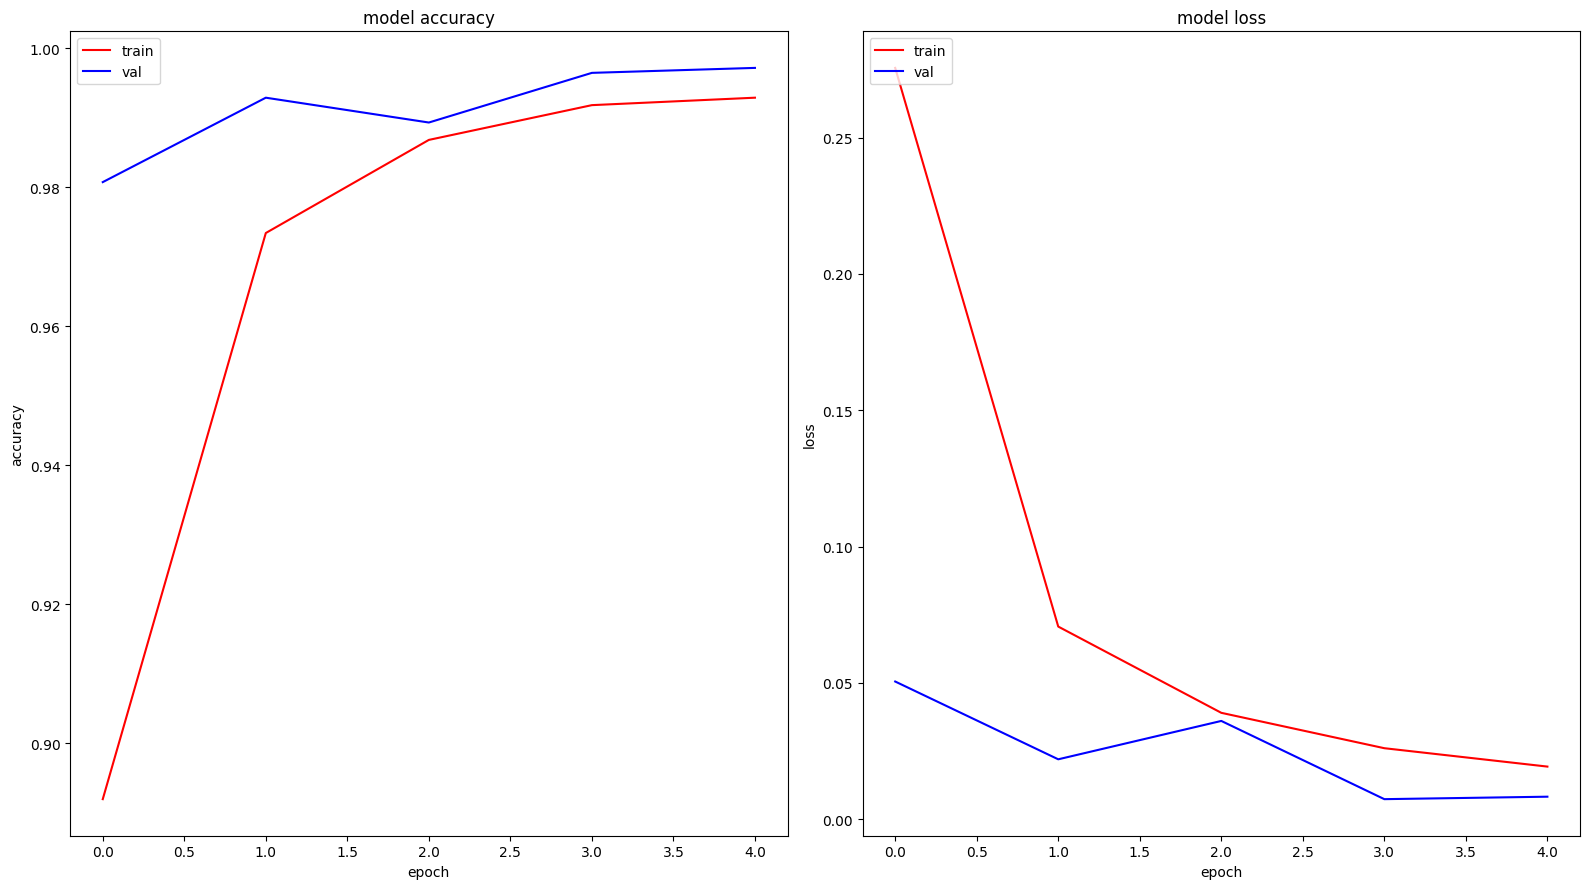

In [36]:
fig = plt.figure( figsize=(16,9))  

# Accuray 
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'],'r')
plt.plot(history1.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Loss 
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'],'r')
plt.plot(history1.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

In [40]:
# Evaluate test_set

test_loss, test_accuracy = model.evaluate(X_test_shuffled, y_test_shuffled)
print(test_loss)
print(test_accuracy)

2025-04-13 14:52:11.774061: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 98304000 exceeds 10% of free system memory.


63/63 [==============================] - 1s 21ms/step - loss: 0.0203 - accuracy: 0.9945
0.02032787725329399
0.9944999814033508


In [45]:
# Overview of all accuracies and losses

train_loss, train_accuracy = model.evaluate(X_train, y_train)  # why do these numbers vary every time?? first 0.9928
val_loss, val_accuracy = model.evaluate(X_val, y_val)
test_loss, test_accuracy = model.evaluate(X_test_shuffled, y_test_shuffled)

# => overfit wegens dalende accuracy
# TODO : DROPOUT for REGULARISATION !!

63/63 [==============================] - 1s 8ms/step - loss: 0.0203 - accuracy: 0.9945


In [54]:
y_pred = model.predict(X_test_shuffled)

y_pred_classes = np.argmax(y_pred, axis=1)

# Testen van het CNN
# Performantie op de test data

# Accuracy
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred_classes) * 100) 
print('\n')

# Recall, precision, f1-score:
print ("Classification report:\n")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cf = confusion_matrix(y_test, y_pred_classes)
print("Confusion matrix:\n\n",cf)

63/63 [==============================] - 0s 7ms/step


accuracy score: 50.0


Classification report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000

Confusion matrix:

 [[1000    0]
 [1000    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
y_pred[0].round(7)

array([1.e-07], dtype=float32)

## Stap 3: Sliding window detectie

Gebruik het model op een grotere afbeelding met meerdere personen:

**Opdracht**:
- Laad een afbeelding met meerdere mensen (bijv. een groepsfoto).
- Gebruik een sliding window aanpak: scan de afbeelding met vensters van 64x64 (of anders volgens jouw keuze) op verschillende posities en schalen.
- Voor elk venster: gebruik het model om een score te berekenen.

**Output**: lijst met bounding boxes en bijbehorende score (confidence dat het een gezicht is).

In [47]:
# change something

path_group='groepsfoto.jpg'
array_group = mpimg.imread(path_group)

array([[[203, 202, 208],
        [203, 202, 208],
        [203, 202, 208],
        ...,
        [254, 249, 243],
        [254, 249, 243],
        [254, 249, 243]],

       [[203, 202, 208],
        [203, 202, 208],
        [203, 202, 208],
        ...,
        [254, 249, 243],
        [254, 249, 243],
        [254, 249, 243]],

       [[203, 202, 208],
        [203, 202, 208],
        [203, 202, 208],
        ...,
        [254, 249, 243],
        [254, 249, 243],
        [254, 249, 243]],

       ...,

       [[  7,   7,   5],
        [ 10,   9,   5],
        [ 15,  10,   6],
        ...,
        [ 78,  73,  69],
        [ 91,  84,  78],
        [ 97,  88,  83]],

       [[  8,   8,   6],
        [ 11,  10,   6],
        [ 16,  11,   7],
        ...,
        [ 71,  66,  62],
        [ 83,  76,  70],
        [ 89,  80,  75]],

       [[ 10,  10,   8],
        [ 12,  11,   7],
        [ 18,  13,   9],
        ...,
        [ 63,  58,  54],
        [ 74,  67,  61],
        [ 79,  70,  65]]

In [48]:
# ask something

array_group.shape  # needs normalization

(683, 1024, 3)

In [49]:
array_group_norm = array_group.astype(np.float32)/255.0
# array_group_norm

array([[[0.79607844, 0.7921569 , 0.8156863 ],
        [0.79607844, 0.7921569 , 0.8156863 ],
        [0.79607844, 0.7921569 , 0.8156863 ],
        ...,
        [0.99607843, 0.9764706 , 0.9529412 ],
        [0.99607843, 0.9764706 , 0.9529412 ],
        [0.99607843, 0.9764706 , 0.9529412 ]],

       [[0.79607844, 0.7921569 , 0.8156863 ],
        [0.79607844, 0.7921569 , 0.8156863 ],
        [0.79607844, 0.7921569 , 0.8156863 ],
        ...,
        [0.99607843, 0.9764706 , 0.9529412 ],
        [0.99607843, 0.9764706 , 0.9529412 ],
        [0.99607843, 0.9764706 , 0.9529412 ]],

       [[0.79607844, 0.7921569 , 0.8156863 ],
        [0.79607844, 0.7921569 , 0.8156863 ],
        [0.79607844, 0.7921569 , 0.8156863 ],
        ...,
        [0.99607843, 0.9764706 , 0.9529412 ],
        [0.99607843, 0.9764706 , 0.9529412 ],
        [0.99607843, 0.9764706 , 0.9529412 ]],

       ...,

       [[0.02745098, 0.02745098, 0.01960784],
        [0.03921569, 0.03529412, 0.01960784],
        [0.05882353, 0

1/1 [==============================] - 0s 23ms/step


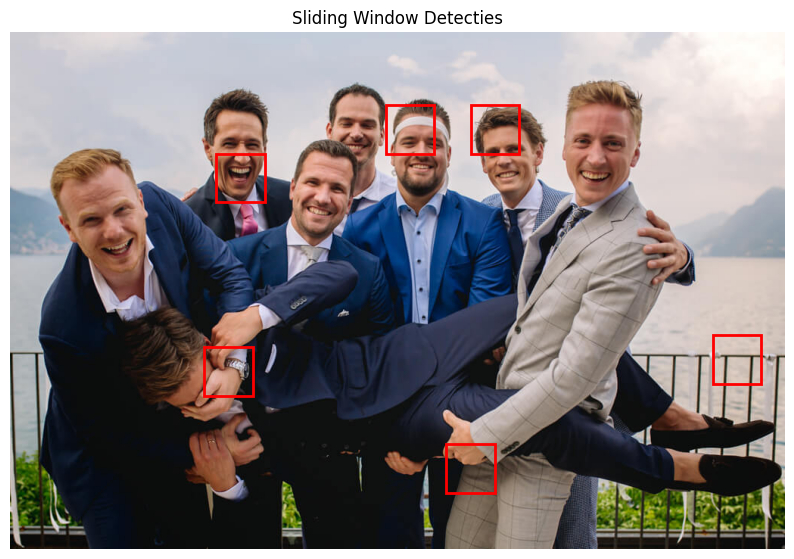

In [64]:
# # chatgpt WITHOUT Non-Maximum Suppression (NMS)    # duurt lang

# Dummy model (replace with your actual model prediction)
# def predict_face(window_array):
#     # Add batch dimension and ensure correct input shape for model
#     input_tensor = np.expand_dims(window_array, axis=0)  # Shape: (1, 64, 64, 3)
#     y_pred1 = model.predict(input_tensor, verbose=1)
#     return y_pred1[0]  # Or adjust if your model returns more complex output


# # Load image (already normalized)
# image = Image.open('groepsfoto.jpg')
# image_np = array_group_norm
# # image = Image.open("groepsfoto.jpg").convert("RGB")
# # image_np = np.array(image) / 255.0  # just in case

# # Sliding window generator
# def sliding_window_pil(image_np, window_size=(64, 64), step_size=16):
#     h, w, _ = image_np.shape
#     win_w, win_h = window_size
#     for y in range(0, h - win_h + 1, step_size):
#         for x in range(0, w - win_w + 1, step_size):
#             window = image_np[y:y+win_h, x:x+win_w]
#             yield x, y, window

# # Parameters
# window_size = (64, 64)
# step_size = 16
# threshold = 0.9

# # Run sliding window detection
# detections = []
# for x, y, window in sliding_window_pil(image_np, window_size, step_size):
#     # Resize window to (64, 64) if needed (you could also just ensure it's always that size)
#     pil_window = Image.fromarray((window * 255).astype(np.uint8)).resize(window_size)
    
#     window_array = np.array(pil_window) / 255.0  # normalize again if resized

#     score = predict_face(window_array)
#     if score > threshold:
#         detections.append((x, y, window_size[0], window_size[1], score))

# # Visualize results
# image_draw = image.copy()
# draw = Image.fromarray((image_np * 255).astype(np.uint8)).copy()
# import matplotlib.patches as patches

# fig, ax = plt.subplots(1, figsize=(10, 10))
# ax.imshow(draw)

# for (x, y, w, h, score) in detections:
#     rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
#     ax.add_patch(rect)
    
#     # Add the score as text above the rectangle
#     ax.text(x, y - 5, f"{score:.2f}", color='red', fontsize=10, weight='bold', backgroundcolor='white')

# plt.title("Sliding Window Detecties")
# plt.axis('off')
# plt.show()
# None

In [66]:
def compute_iou(box1, box2):
    x1, y1, w1, h1 = box1[:4]
    x2, y2, w2, h2 = box2[:4]

    # Calculate intersection
    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)

    inter_width = max(0, xi2 - xi1)
    inter_height = max(0, yi2 - yi1)
    intersection = inter_width * inter_height

    # Calculate union
    area1 = w1 * h1
    area2 = w2 * h2
    union = area1 + area2 - intersection

    iou = intersection / union if union != 0 else 0
    return iou

In [67]:
def non_max_suppression(detections, iou_threshold=0.3):
    if not detections:
        return []

    # Sort by score (highest first)
    detections = sorted(detections, key=lambda x: x[4], reverse=True)

    final_detections = []

    while detections:
        best = detections.pop(0)
        final_detections.append(best)

        # Remove overlapping boxes
        detections = [d for d in detections if compute_iou(best, d) < iou_threshold]

    return final_detections

1/1 [==============================] - 0s 67ms/step


TypeError: unsupported format string passed to numpy.ndarray.__format__

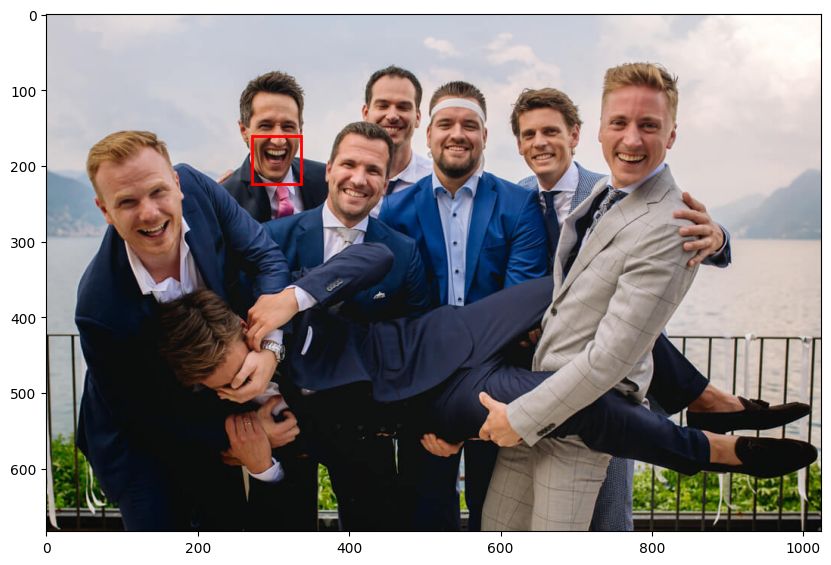

In [68]:
# chatgpt WITH Non-Maximum Suppression (NMS)    # duurt lang

# Dummy model (replace with your actual model prediction)
def predict_face(window_array):
    # Add batch dimension and ensure correct input shape for model
    input_tensor = np.expand_dims(window_array, axis=0)  # Shape: (1, 64, 64, 3)
    y_pred1 = model.predict(input_tensor, verbose=0)
    return y_pred1[0]  # Or adjust if your model returns more complex output


# Load image (already normalized)
image = Image.open('groepsfoto.jpg')
image_np = array_group_norm
# image = Image.open("groepsfoto.jpg").convert("RGB")
# image_np = np.array(image) / 255.0  # just in case

# Sliding window generator
def sliding_window_pil(image_np, window_size=(64, 64), step_size=16):
    h, w, _ = image_np.shape
    win_w, win_h = window_size
    for y in range(0, h - win_h + 1, step_size):
        for x in range(0, w - win_w + 1, step_size):
            window = image_np[y:y+win_h, x:x+win_w]
            yield x, y, window

# Parameters
window_size = (64, 64)
step_size = 16
threshold = 0.9

# Run sliding window detection
detections = []
for x, y, window in sliding_window_pil(image_np, window_size, step_size):
    # Resize window to (64, 64) if needed (you could also just ensure it's always that size)
    pil_window = Image.fromarray((window * 255).astype(np.uint8)).resize(window_size)
    
    window_array = np.array(pil_window) / 255.0  # normalize again if resized

    score = predict_face(window_array)
    if score > threshold:
        detections.append((x, y, window_size[0], window_size[1], score))
        
# Apply Non-Maximum Suppression
nms_detections = non_max_suppression(detections, iou_threshold=0.3)

# Visualize results
image_draw = image.copy()
draw = Image.fromarray((image_np * 255).astype(np.uint8)).copy()
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(draw)

for (x, y, w, h, score) in nms_detections:
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    
    # Add the score as text above the rectangle
    ax.text(x, y - 5, f"{score:.2f}", color='red', fontsize=10, weight='bold', backgroundcolor='white')

plt.title("Sliding Window Detecties")
plt.axis('off')
plt.show()

print(nms_detections)
None

In [65]:
detections

[(496, 96, 64, 64, array([0.9570207], dtype=float32)),
 (608, 96, 64, 64, array([0.97168845], dtype=float32)),
 (272, 160, 64, 64, array([0.9999969], dtype=float32)),
 (928, 400, 64, 64, array([0.9752558], dtype=float32)),
 (256, 416, 64, 64, array([0.99944204], dtype=float32)),
 (576, 544, 64, 64, array([0.93068516], dtype=float32))]

## Stap 4: Bounding boxes tekenen

**Opdracht**:
- Teken de bounding boxes op de originele afbeelding.
- Toon de score (bijv. boven de box).

Gebruik vb `cv2.rectangle` en `cv2.putText`.

## Stap 5: Non-Maximum Suppression (NMS)

Overlappende boxes voor hetzelfde gezicht moeten gefilterd worden.

**Opdracht**:
- Implementeer NMS:
  - Sorteer boxes op score
  - Verwijder alle boxes die overlappen met een hogere-score box (IOU > 0.5)
- Visualiseer het verschil vóór en ná NMS.